Add the kaggle API to the environment and run the next command to relocate the file so the API can read it.

In [11]:
!mv kaggle.json /root/.kaggle/kaggle.json # for colab if you upload the kaggle.json
# !mv ../input/kaggle-json/kaggle.json /root/.kaggle/kaggle.json # for kaggle if you upload your kaggle.json in a folder called 'kaggle-json'
!kaggle datasets download -d marcosvolpato/edible-and-poisonous-fungi
!mkdir dataset && unzip -q edible-and-poisonous-fungi.zip -d dataset
%cd dataset

edible-and-poisonous-fungi.zip: Skipping, found more recently modified local copy (use --force to force download)
/content/dataset


In [12]:
import glob
from skimage import io
edible = [io.imread(img) for img in glob.glob("edible mushroom sporocarp/*") + glob.glob("edible sporocarp/*")]
non_edible = [io.imread(img) for img in glob.glob("poisonous mushroom sporocarp/*") + glob.glob("poisonous sporocarp/*")]
# non_edible = [io.imread(img) for img in glob.glob("poisonous mushroom sporocarp/*")[:590] + glob.glob("poisonous sporocarp/*")[:591]] # the way to get the same amount of edible imgs
len(edible), len(non_edible)

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


(1181, 2220)

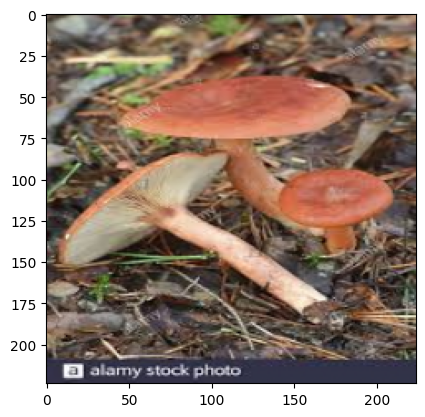

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(edible[0]);

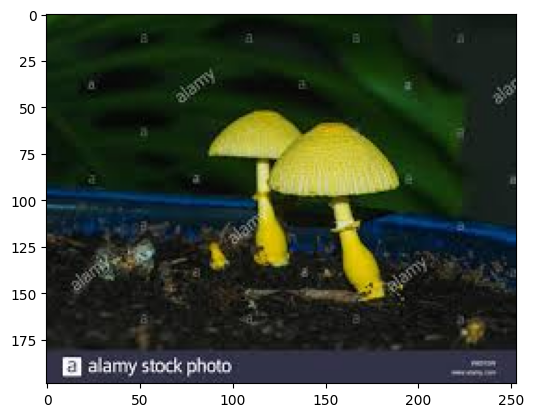

In [ ]:
plt.imshow(non_edible[0]);

In [ ]:
for i in edible[:10]:
    print(len(i))

190
192
194
164
248
225
194
183
194
194


The images have different shapes

In [ ]:
import numpy as np
np.min(edible[0]), np.max(edible[0])

(0, 255)

The pixel values goes from 0 to 255

In [ ]:
import numpy as np
def preprocess_imgs(images, output_shape):
    from skimage.transform import resize
    for i in range(len(images)):
        images[i] = resize(images[i], output_shape=output_shape)
        images[i] = ((images[i]-np.min(images[i]))/(np.max(images[i])-np.min(images[i]))*255).astype(int)

In [ ]:
input_shape = (224,224,3)
preprocess_imgs(edible, input_shape)
preprocess_imgs(non_edible, input_shape)
for i in edible[:5]:
    print(len(i))

224
224
224
224
224


Inspect images

In [ ]:
import numpy as np
def display_imgs(w, figsize=(10,10)):
    plt.figure(figsize=figsize)
    for i in range(w.shape[0]):
        plt.subplot(6,6,i+1)
        plt.imshow(w[i,:,:,:])
        plt.axis("off")

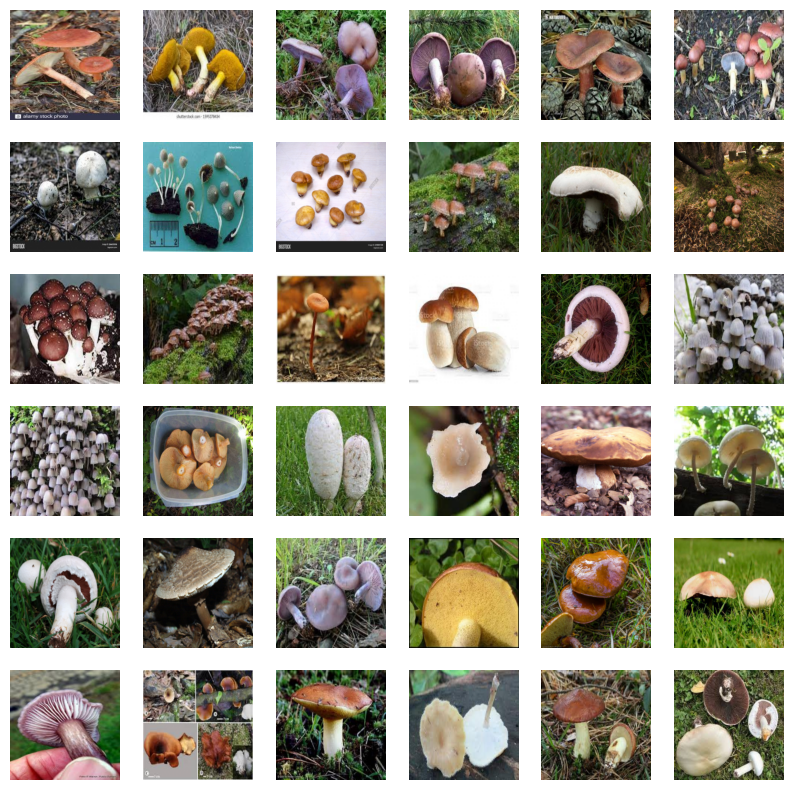

In [ ]:
display_imgs(np.asarray(edible[:36]))

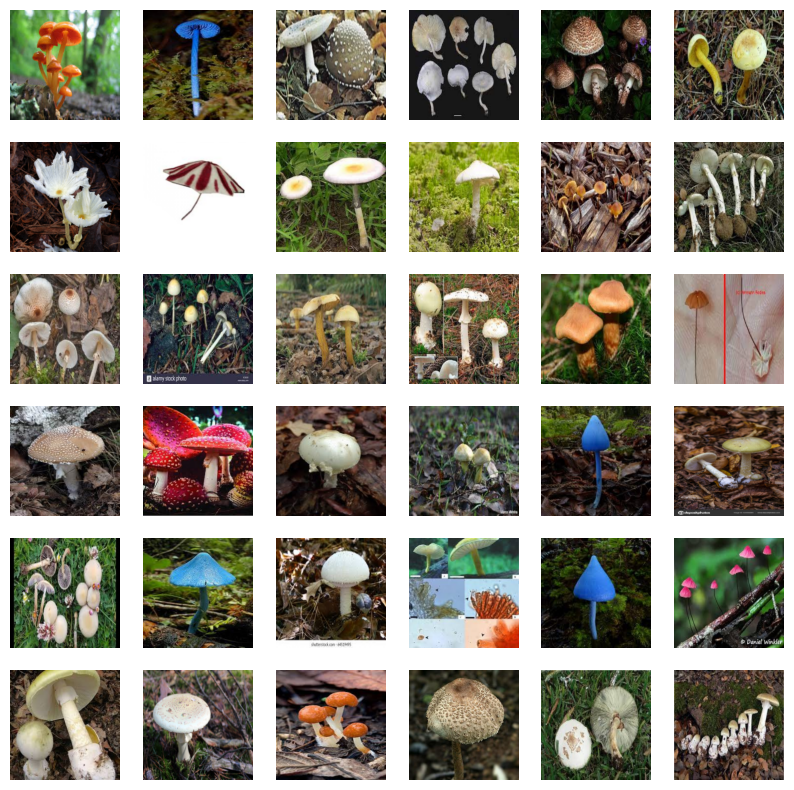

In [ ]:
display_imgs(np.array(non_edible[:36]))

The classes observed in the images are not easily distinguishable, the images are pretty diverse.

The preprocessing consist in resizing images, and may include scaling as need it.